In [5]:
import os
import glob
import numpy as np
from astropy.table import Table
from ccdproc import ImageFileCollection
from tqdm import tqdm

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 20
plt.rcParams["savefig.dpi"] = 500
mpl.rcParams["xtick.labelsize"] = 14  # X축 틱의 글자 크기 설정
mpl.rcParams["ytick.labelsize"] = 14  # Y축 틱의 글자 크기 설정
plt.rc("font", family="serif")

In [7]:
def makeSpecColors(n, palette='Spectral'):
	#	Color palette
	import seaborn as sns
	palette = sns.color_palette(palette, as_cmap=True,)
	palette.reversed

	clist_ = [palette(i) for i in range(palette.N)]
	cstep = int(len(clist_)/n)
	clist = [clist_[i*cstep] for i in range(n)]
	return clist

In [8]:
wavelengths= np.arange(4000, 8875+125, 125)

wfilters = ['m375w', 'm425w']
mfilters = [f"m{str(center_lam)[0:3]}" for center_lam in wavelengths]
mcolors = np.array(makeSpecColors(len(mfilters)))[::-1]
mlamarr = np.array([float(filte[1:]) for filte in mfilters])
bfilters = ['u', 'g', 'r', 'i', 'z']
filter_color_palette_dict = {
	'u': 'blue',
	'g': 'green',
	'r': 'tomato',
	'i': 'crimson',
	'z': 'purple',
	'm375w': 'cyan',
	'm425w': 'dodgerblue',
}

filters = mfilters+bfilters+wfilters

for filte, c in zip(mfilters, mcolors):
	filter_color_palette_dict[filte] = c


In [9]:
keys = [
	'file',
	'simple',
	'bitpix',
	'naxis',
	'naxis1',
	'naxis2',
	'extend',
	'equinox',
	'mjd-obs',
	'radesys',
	'ctype1',
	'cunit1',
	'crval1',
	'crpix1',
	'cd1_1',
	'cd1_2',
	'ctype2',
	'cunit2',
	'crval2',
	'crpix2',
	'cd2_1',
	'cd2_2',
	'exptime',
	'gain',
	'saturate',
	'softname',
	'softvers',
	'softdate',
	'softauth',
	'softinst',
	'author',
	'origin',
	'date',
	'combinet',
	'imagetyp',
	'xbinning',
	'ybinning',
	'egain',
	'xpixsz',
	'ypixsz',
	'instrume',
	'set-temp',
	'ccd-temp',
	'telescop',
	'focallen',
	'ra',
	'dec',
	'siteelev',
	'sitelat',
	'sitelong',
	'filter',
	'object',
	'objctra',
	'objctdec',
	'focuspos',
	'resampt1',
	'centert1',
	'pscalet1',
	'resampt2',
	'centert2',
	'pscalet2',
	'file0001',
	'intf0001',
	'subf0001',
	'bckt0001',
	'bcks0001',
	'bkfs0001',
	'file0002',
	'intf0002',
	'subf0002',
	'bckt0002',
	'bcks0002',
	'bkfs0002',
	'file0003',
	'intf0003',
	'subf0003',
	'bckt0003',
	'bcks0003',
	'bkfs0003',
	'date-obs',
	'date-loc',
	'exposure',
	'centalt',
	'centaz',
	'airmass',
	'mjd',
	'jd',
	'photime',
	'seeing',
	'peeing',
	'ellip',
	'elong',
	'skysig',
	'skyval',
	'refcat',
	'maglow',
	'magup',
	'stdnumb',
	'auto',
	'aper',
	'aper_1',
	'aper_2',
	'aper_3',
	'aper_4',
	'aper_5',
	'zp_auto',
	'ezp_auto',
	'ul3_auto',
	'ul5_auto',
	'zp_0',
	'ezp_0',
	'ul3_0',
	'ul5_0',
	'zp_1',
	'ezp_1',
	'ul3_1',
	'ul5_1',
	'zp_2',
	'ezp_2',
	'ul3_2',
	'ul5_2',
	'zp_3',
	'ezp_3',
	'ul3_3',
	'ul5_3',
	'zp_4',
	'ezp_4',
	'ul3_4',
	'ul5_4',
	'zp_5',
	'ezp_5',
	'ul3_5',
	'ul5_5',
	]

In [10]:
print("Reading the table...")
table = Table.read(f"/large_data/factory/RIS_{input('Date?')}_summary.csv",)[keys]
filters = list(np.unique(table['filter']))
print(f"{len(filters)} filters: {filters}")
print("Done!")

Reading the table...
21 filters: ['m400', 'm425', 'm450', 'm475', 'm500', 'm525', 'm550', 'm575', 'm600', 'm625', 'm650', 'm675', 'm700', 'm725', 'm750', 'm775', 'm800', 'm825', 'm850', 'm875', 'r']
Done!


In [11]:
import string

alphabet_string = string.ascii_uppercase

mosaic = f"""
{alphabet_string[0:5]}
{alphabet_string[5:10]}
{alphabet_string[10:15]}
{alphabet_string[15:20]}
"""

# Analysis

## Seeing

/tmp/ipykernel_1602083/1247622101.py:14: UserWarning: Warning: converting a masked element to nan.
  values = [float(val) for val in table['seeing'][table['filter'] == filte]]


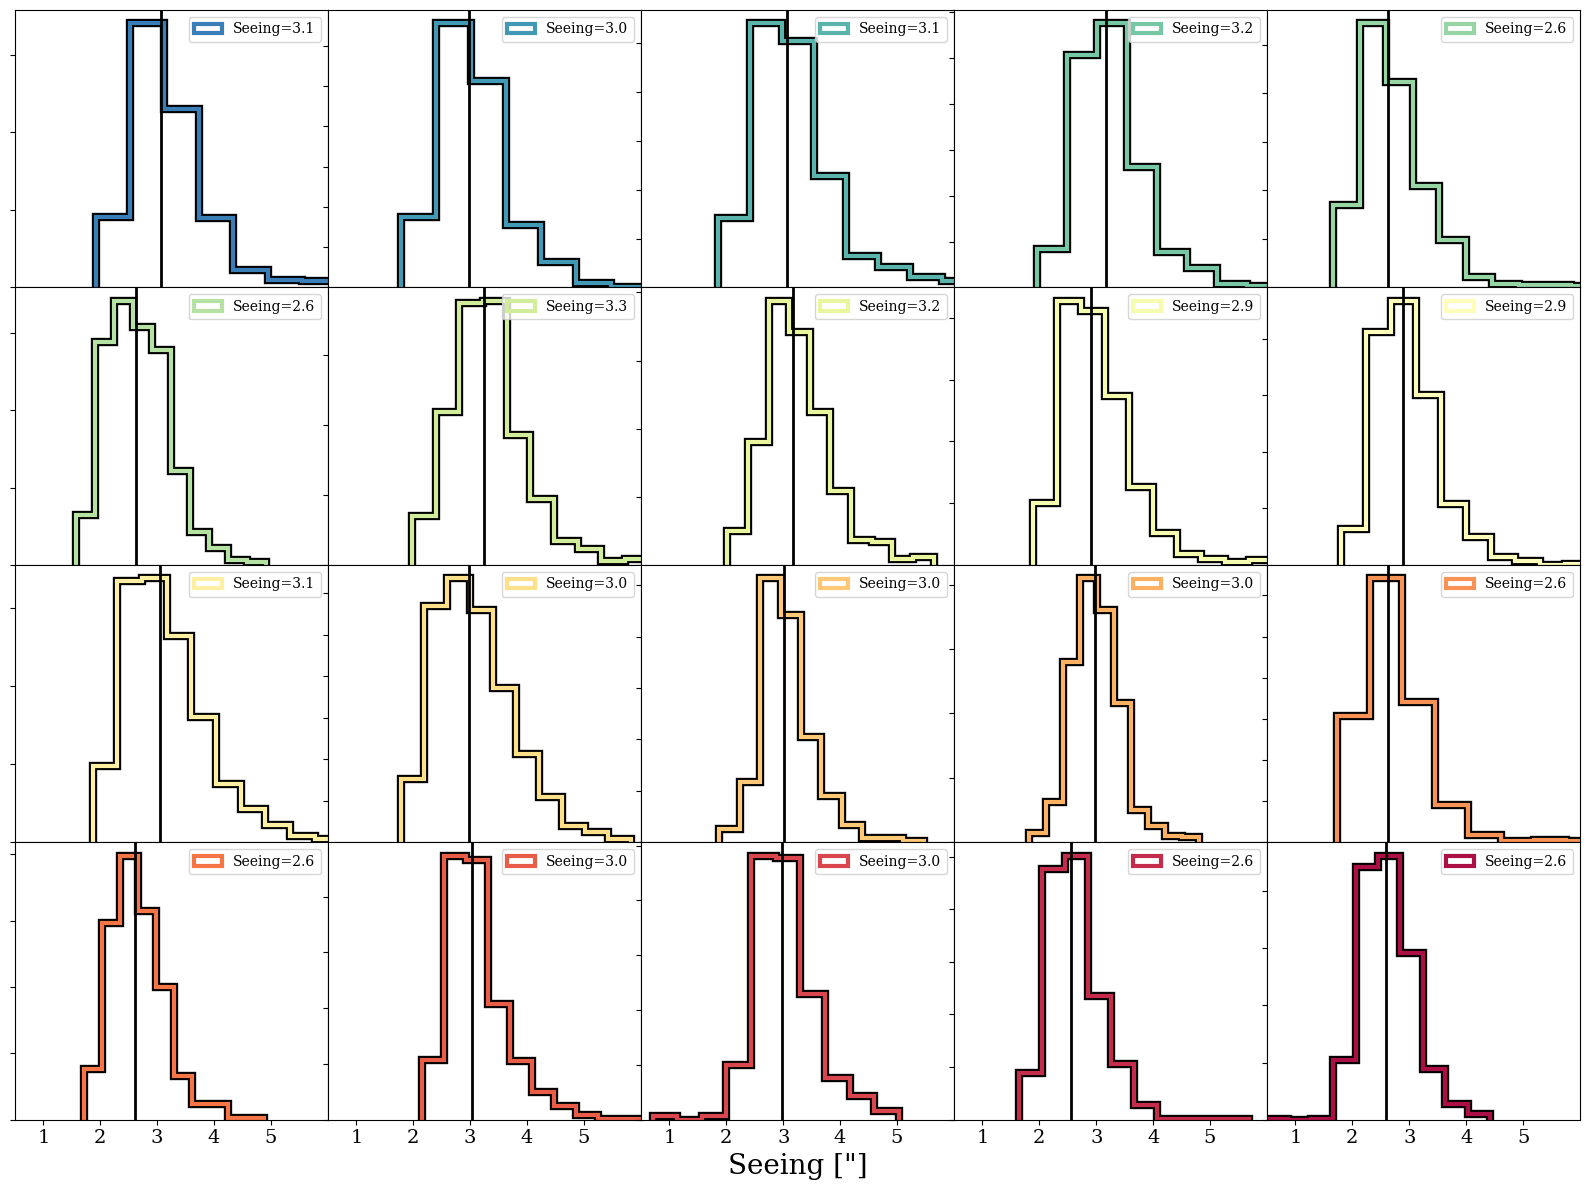

In [12]:

fig, ax = plt.subplot_mosaic(
	mosaic, figsize=(16, 12),
	empty_sentinel="x",
	gridspec_kw=dict(
		wspace=0.0, hspace=0.0,
	)
)

# 
for ff, (filte, alphabet) in enumerate(zip(filters, alphabet_string[:20])):
	if filte != 'r':
		# print(filte)
		color = filter_color_palette_dict[filte]
		values = [float(val) for val in table['seeing'][table['filter'] == filte]]
		med_value = np.nanmedian(values)

		# Main Axe
		ax[alphabet].hist(values, histtype='step', lw=6, color='k', alpha=1.0, zorder=0)
		ax[alphabet].hist(values, histtype='step', lw=3, color=color, alpha=1.0, label=f"""Seeing={med_value:.1f}""")
		ax[alphabet].axvline(x=med_value, ls='-', lw=2, color='k')

		# ax[alphabet].set_xlim([xr, xl])
		if alphabet == 'R':
			ax[alphabet].set_xlabel("""Seeing ["]""")
		
		ax[alphabet].set_xlim([0.5, 6.0])
		ax[alphabet].set_xticks(np.arange(1.0, 5.+1., 1.0))


		# ax[alphabet].set_ylabel(r'5$\sigma$ Depth [AB mag]')
		# ax[alphabet].grid('both', ls='--', alpha=0.5, color='silver', zorder=0)
		# ax[alphabet].legend(loc='upper left', fontsize=14, framealpha=1.0)

		# Remove tick labels for cleaner look
		# ax[alphabet].tick_params(labelbottom=False)
		ax[alphabet].tick_params(labelleft=False)
		ax[alphabet].legend(loc='upper right')

# Add a title
# plt.suptitle(f"{obj} ({filte})", fontsize=20)
fig.tight_layout()

## Depth

/tmp/ipykernel_1602083/2504753101.py:14: UserWarning: Warning: converting a masked element to nan.
  values = [float(val) for val in table['ul5_1'][table['filter'] == filte]]


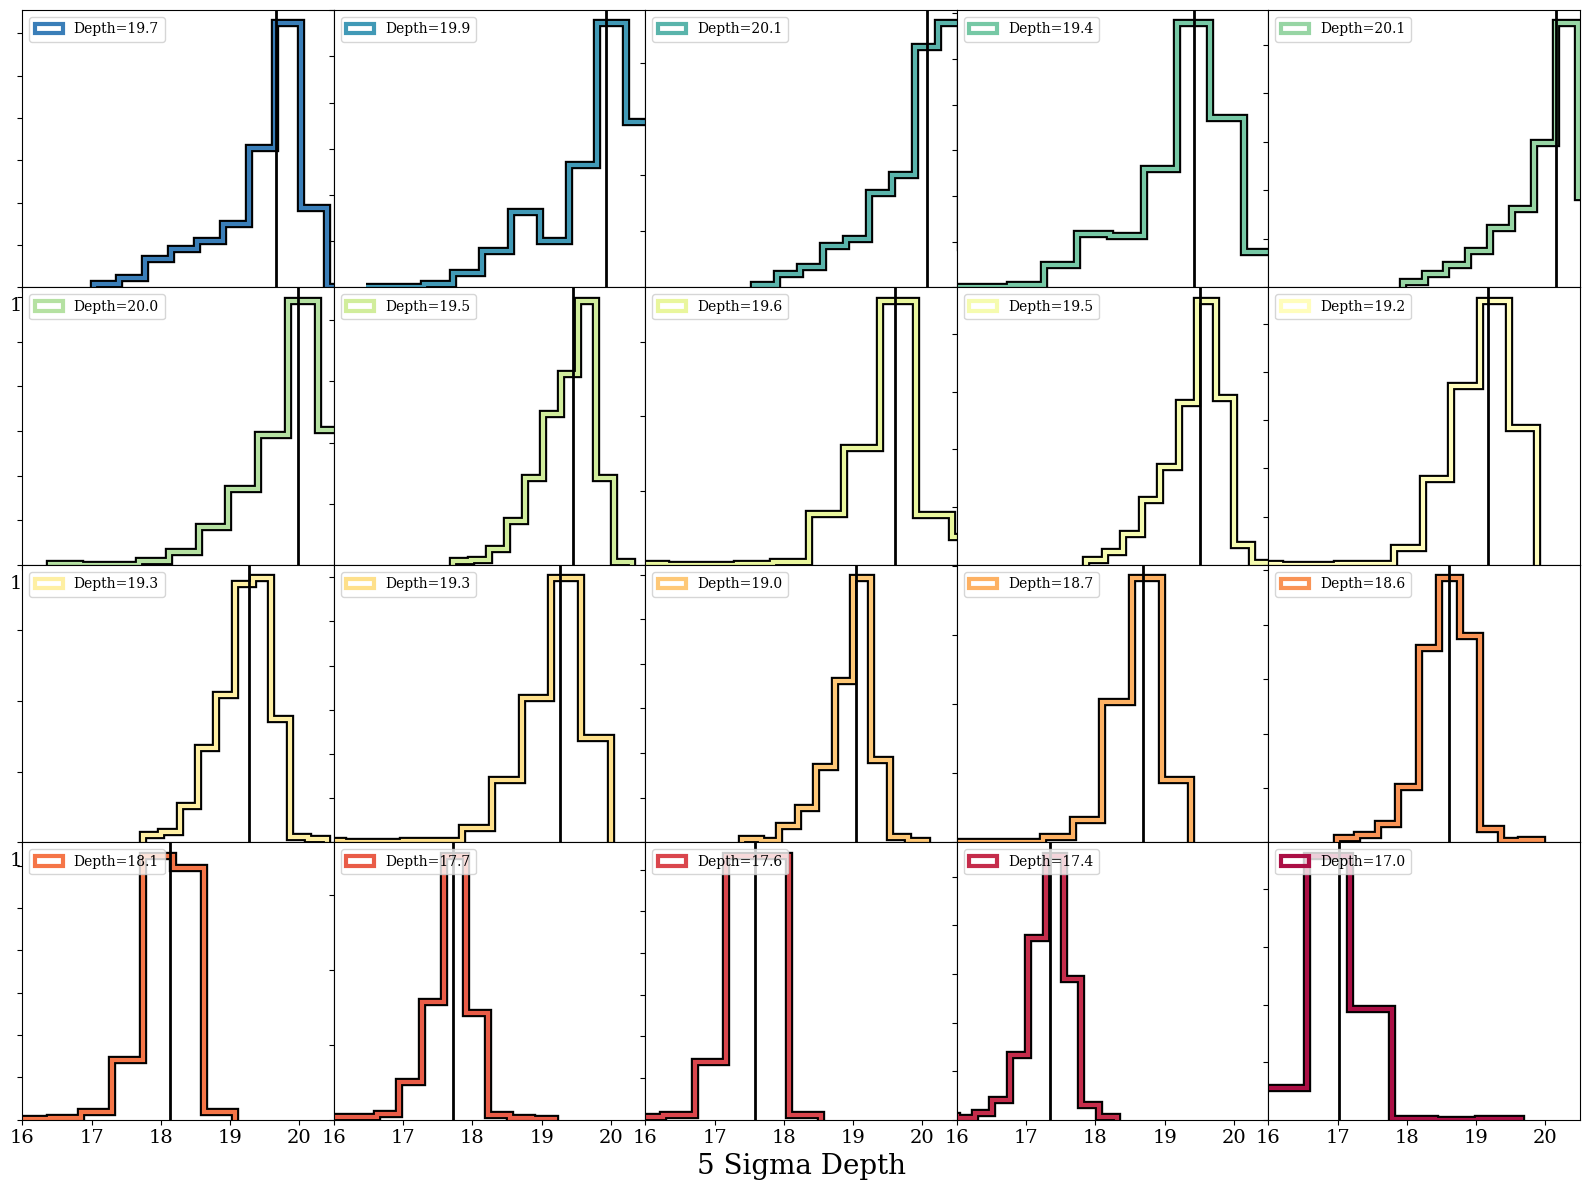

In [13]:

fig, ax = plt.subplot_mosaic(
	mosaic, figsize=(16, 12),
	empty_sentinel="x",
	gridspec_kw=dict(
		wspace=0.0, hspace=0.0,
	)
)

# 
for ff, (filte, alphabet) in enumerate(zip(filters, alphabet_string[:20])):
	if filte != 'r':
		# print(filte)
		color = filter_color_palette_dict[filte]
		values = [float(val) for val in table['ul5_1'][table['filter'] == filte]]
		med_value = np.nanmedian(values)

		# Main Axe
		ax[alphabet].hist(values, histtype='step', lw=6, color='k', alpha=1.0, zorder=0)
		ax[alphabet].hist(values, histtype='step', lw=3, color=color, alpha=1.0, label=f"""Depth={med_value:.1f}""")
		ax[alphabet].axvline(x=med_value, ls='-', lw=2, color='k')

		# ax[alphabet].set_xlim([xr, xl])
		if alphabet == 'R':
			ax[alphabet].set_xlabel("""5 Sigma Depth""")
		
		ax[alphabet].set_xlim([16, 20.5])
		# ax[alphabet].set_xticks(np.arange(1.0, 5.+1., 1.0))


		# ax[alphabet].set_ylabel(r'5$\sigma$ Depth [AB mag]')
		# ax[alphabet].grid('both', ls='--', alpha=0.5, color='silver', zorder=0)
		# ax[alphabet].legend(loc='upper left', fontsize=14, framealpha=1.0)

		# Remove tick labels for cleaner look
		# ax[alphabet].tick_params(labelbottom=False)
		ax[alphabet].tick_params(labelleft=False)
		ax[alphabet].legend(loc='upper left')

# Add a title
# plt.suptitle(f"{obj} ({filte})", fontsize=20)
fig.tight_layout()

## ZP

/tmp/ipykernel_1602083/546332551.py:14: UserWarning: Warning: converting a masked element to nan.
  values = [float(val) for val in table['zp_1'][table['filter'] == filte]]


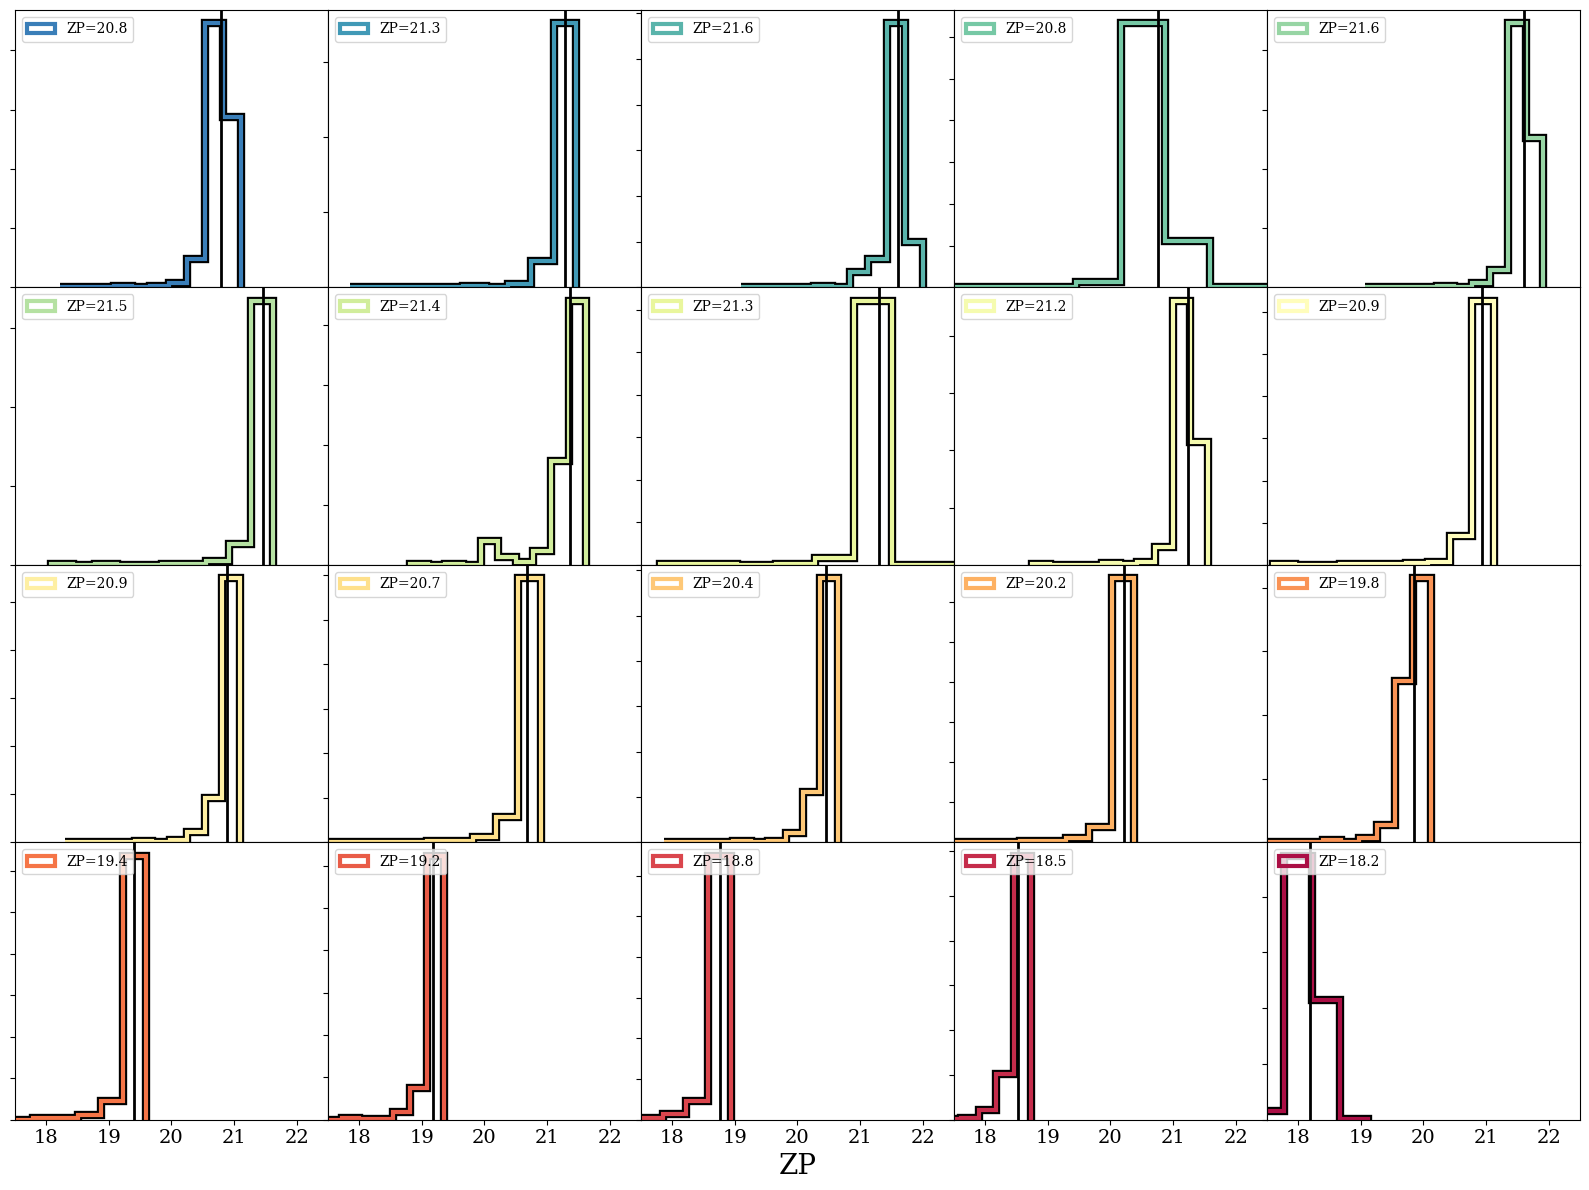

In [52]:

fig, ax = plt.subplot_mosaic(
	mosaic, figsize=(16, 12),
	empty_sentinel="x",
	gridspec_kw=dict(
		wspace=0.0, hspace=0.0,
	)
)

# 
for ff, (filte, alphabet) in enumerate(zip(filters, alphabet_string[:20])):
	if filte != 'r':
		# print(filte)
		color = filter_color_palette_dict[filte]
		values = [float(val) for val in table['zp_1'][table['filter'] == filte]]
		med_value = np.nanmedian(values)

		# Main Axe
		ax[alphabet].hist(values, histtype='step', lw=6, color='k', alpha=1.0, zorder=0)
		ax[alphabet].hist(values, histtype='step', lw=3, color=color, alpha=1.0, label=f"""ZP={med_value:.1f}""")
		ax[alphabet].axvline(x=med_value, ls='-', lw=2, color='k')

		# ax[alphabet].set_xlim([xr, xl])
		if alphabet == 'R':
			ax[alphabet].set_xlabel("""ZP""")
		
		ax[alphabet].set_xlim([17.5, 22.5])
		# ax[alphabet].set_xticks(np.arange(1.0, 5.+1., 1.0))


		# ax[alphabet].set_ylabel(r'5$\sigma$ Depth [AB mag]')
		# ax[alphabet].grid('both', ls='--', alpha=0.5, color='silver', zorder=0)
		# ax[alphabet].legend(loc='upper left', fontsize=14, framealpha=1.0)

		# Remove tick labels for cleaner look
		# ax[alphabet].tick_params(labelbottom=False)
		ax[alphabet].tick_params(labelleft=False)
		ax[alphabet].legend(loc='upper left')

# Add a title
# plt.suptitle(f"{obj} ({filte})", fontsize=20)
fig.tight_layout()

/tmp/ipykernel_1602083/4226564676.py:5: UserWarning: Warning: converting a masked element to nan.
  values = [float(val) for val in table['zp_1'][table['filter'] == filte]]


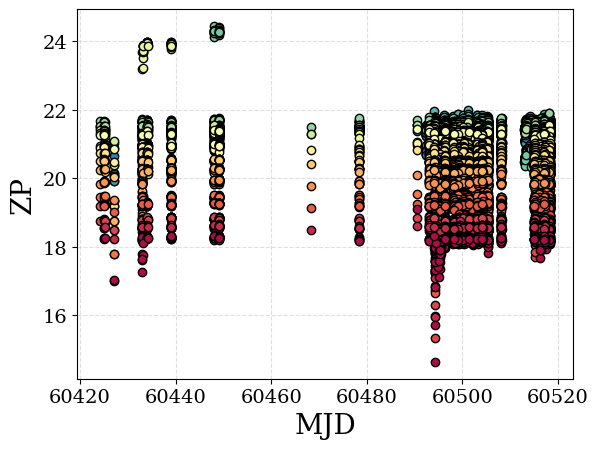

In [51]:
for ff, (filte, alphabet) in enumerate(zip(filters, alphabet_string[:20])):
	if filte != 'r':
		# print(filte)
		color = filter_color_palette_dict[filte]
		values = [float(val) for val in table['zp_1'][table['filter'] == filte]]
		times = [float(val) for val in table['mjd'][table['filter'] == filte]]
		
		med_value = np.nanmedian(values)
	
		plt.plot(times, values, 'o', c=color, mec='k')

plt.xlabel("MJD")
plt.ylabel("ZP")
plt.grid('both', ls='--', color='silver', alpha=0.5, zorder=0)

In [32]:
import seaborn as sns

/tmp/ipykernel_1602083/2220901492.py:5: UserWarning: Warning: converting a masked element to nan.
  values = [float(val) for val in table['zp_1'][table['filter'] == filte]]
/tmp/ipykernel_1602083/2220901492.py:5: UserWarning: Warning: converting a masked element to nan.
  values = [float(val) for val in table['zp_1'][table['filter'] == filte]]
/tmp/ipykernel_1602083/2220901492.py:5: UserWarning: Warning: converting a masked element to nan.
  values = [float(val) for val in table['zp_1'][table['filter'] == filte]]
/tmp/ipykernel_1602083/2220901492.py:5: UserWarning: Warning: converting a masked element to nan.
  values = [float(val) for val in table['zp_1'][table['filter'] == filte]]
/tmp/ipykernel_1602083/2220901492.py:5: UserWarning: Warning: converting a masked element to nan.
  values = [float(val) for val in table['zp_1'][table['filter'] == filte]]
/tmp/ipykernel_1602083/2220901492.py:5: UserWarning: Warning: converting a masked element to nan.
  values = [float(val) for val in tab

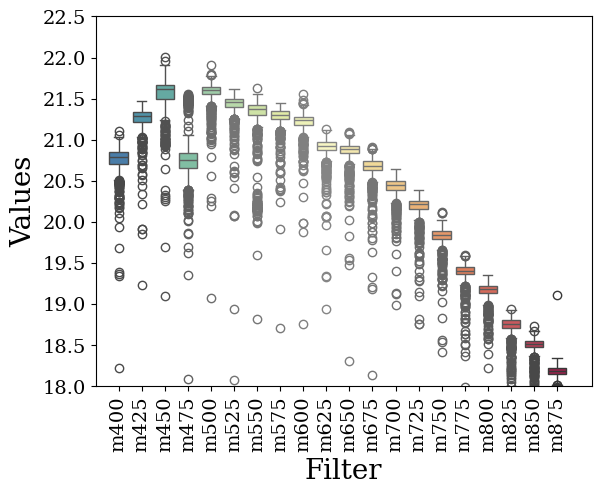

In [50]:
for ff, (filte, alphabet) in enumerate(zip(filters, alphabet_string[:20])):
	if filte != 'r':
		# print(filte)
		color = filter_color_palette_dict[filte]
		values = [float(val) for val in table['zp_1'][table['filter'] == filte]]
		times = [float(val) for val in table['mjd'][table['filter'] == filte]]
		
		med_value = np.nanmedian(values)
	
		# 수염그래프 그리기
		sns.boxplot(data=values, showfliers=True, color=color, positions=[ff])

# x축에 라벨 추가
plt.xticks(np.arange(len(filters[:20])), filters[:20], rotation=90)

# 그래프 제목 및 축 라벨 추가
plt.xlabel('Filter')
plt.ylabel('Values')
plt.ylim(18, 22.5)
plt.xlim(-1, 20.5)

# 그래프 출력
plt.show()